In [26]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian2DKernel
from csv import reader
from collections import defaultdict
import pandas as pd

In [9]:
# Loading crime csv to RDD
# Replace with your directory
crime_csv = sc.textFile('file:/Users/zhuorulin/Documents/DataScience/datasets/NYPD_Complaint_Data_Historic.csv',use_unicode=False)

In [11]:
# Use csv.reader to read raw binary
lines_rdd = crime_csv.mapPartitions(reader)\
.map(lambda line: [x.decode('utf-8') for x in line] )# Decode with utf-8 codec
# store columns values. Also a search table for searching column name using index
schemas = lines_rdd.take(1)[0]
# filter out first row
lines = lines_rdd.filter(lambda x: x!=schemas)
colname2idx = defaultdict()
for idx,colname in enumerate(schemas):
    colname2idx[colname] = idx

In [15]:
%run ../utilities.py

In [16]:
coordinates = lines.map(lambda x: [x[colname2idx['Longitude']],x[colname2idx['Latitude']]])\
.filter(lambda x: checkLongitude(x[0])=='VALID')

In [17]:
coordinates_collection = coordinates.collect()

In [20]:
coordinates_collection = [[float(x[0]),float(x[1])] for x in coordinates_collection]

In [33]:
coordinates_collection = np.array(coordinates_collection)

In [35]:
coordinates_collection[:,0].shape

(4913085,)

In [92]:
x = coordinates_collection[:,0]
y = coordinates_collection[:,1]
heatmap, xedges, yedges = np.histogram2d(-y, x, bins=2000)

In [93]:
convolve_heat = convolve(heatmap, Gaussian2DKernel(stddev=2))

In [136]:
plt.figure(figsize=(10,10))
cax = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=2))**(0.3), interpolation='none')
plt.colorbar(cax)
plt.axis('off')
plt.title('New York City crime heat map (2005-2015)')

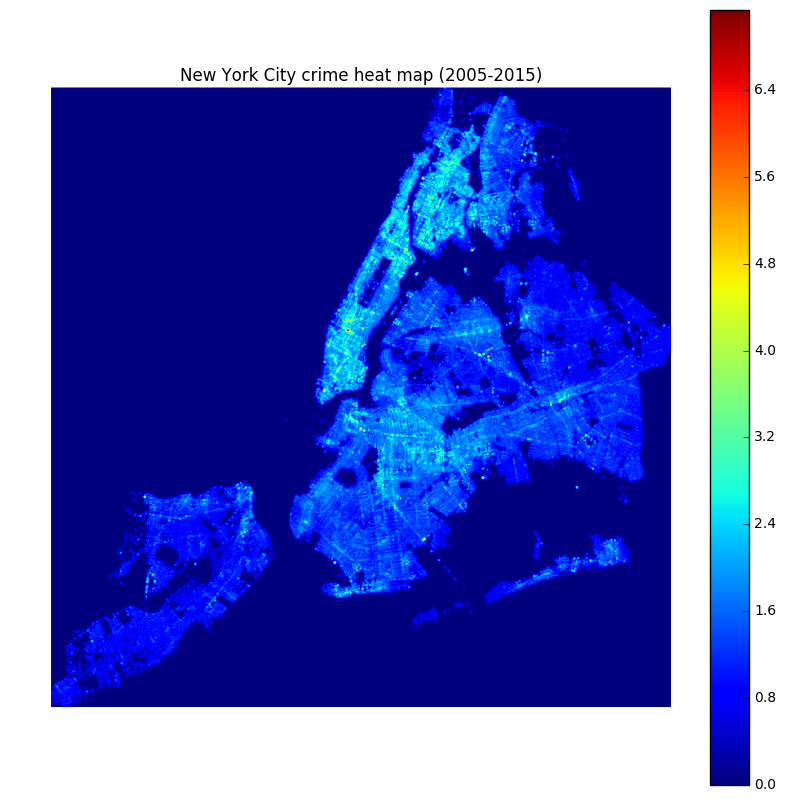

In [137]:
plt.savefig('2005_2015_heat.png')
plt.show()